## Introduction
In this project, we are going to analyze the funding received by start-ups in India from 2018 to 2021. Our goal is to investigate the Indian start-up ecosystem and propose the best course of action for our team's venture into this market.

## Research Question
What are the trends in start-up funding in India from 2018 to 2021, and how can we leverage these trends to maximize our chances of success in the Indian start-up ecosystem?

## Hypothesis
Our hypothesis is that start-ups in certain sectors are more likely to receive funding and that the amount of funding received by start-ups is positively correlated with the number of investors and the stage of funding reached.

## Questions
1. What are the most popular sectors for start-ups in India from 2018 to 2021?
1. How has the total funding amount for start-ups changed over the years?
1. Which stage of funding (Seed, Series A, B, etc.) has received the most funding in India from 2018 to 2021?
1. Which start-ups have received the highest funding amounts, and what sectors do they belong to?
1. Are there any correlations between the amount of funding received, the number of investors, and the stage of funding reached?

### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## load the datasets

In [2]:
# load 2021 dataset
df_21=pd.read_csv('startup_funding21.csv')
# load 2020 dataset
df_20=pd.read_csv('startup_funding2020.csv')
# load 2019 dataset
df_19=pd.read_csv('startup_funding2019.csv')
# load 2018 dataset
df_18=pd.read_csv('startup_funding2018.csv')

### Clean the 2021 data

In [3]:

df_21.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [4]:
# shape
df_21.shape

(1207, 9)

In [5]:
# unique entries in Amount($)
df_21['Amount($)'].unique()

array(['$1,200,000 ', '$120,000,000 ', '$30,000,000 ', '$51,000,000 ',
       '$2,000,000 ', '$188,000,000 ', '$200,000 ', 'Undisclosed',
       '$1,000,000 ', '$3,000,000 ', '$100,000 ', '$700,000 ',
       '$9,000,000 ', '$40,000,000 ', '$49,000,000 ', '$400,000 ',
       '$300,000 ', '$25,000,000 ', '$160,000,000 ', '$150,000 ',
       '$1,800,000 ', '$5,000,000 ', '$850,000 ', '$53,000,000 ',
       '$500,000 ', '$1,100,000 ', '$6,000,000 ', '$800,000 ',
       '$10,000,000 ', '$21,000,000 ', '$7,500,000 ', '$26,000,000 ',
       '$7,400,000 ', '$1,500,000 ', '$600,000 ', '$800,000,000 ',
       '$17,000,000 ', '$3,500,000 ', '$15,000,000 ', '$215,000,000 ',
       '$2,500,000 ', '$350,000,000 ', '$5,500,000 ', '$83,000,000 ',
       '$110,000,000 ', '$500,000,000 ', '$65,000,000 ',
       '$150,000,000,000.00 ', '$300,000,000 ', '$2,200,000 ',
       '$35,000,000 ', '$140,000,000 ', '$4,000,000 ', '$13,000,000 ',
       nan, '$Undisclosed', '$9,500,000 ', '$8,000,000 ', '$12,000,0

In [6]:
df_21['Amount($)']=df_21['Amount($)'].str.replace('$','')

C:\Users\Wycliffe\AppData\Local\Temp\ipykernel_3440\22158952.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_21['Amount($)']=df_21['Amount($)'].str.replace('$','')


In [7]:
df_21['Amount($)'].head()

0      1,200,000 
1    120,000,000 
2     30,000,000 
3     51,000,000 
4      2,000,000 
Name: Amount($), dtype: object

In [8]:
df_21.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","1,200,000",Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","120,000,000",NaN
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","30,000,000",Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","51,000,000",Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","2,000,000",Seed


In [9]:
# Find the total number of Undisclosed funding
undisclosed_count = df_21[df_21['Amount($)'] == 'Undisclosed']['Amount($)'].count()
undisclosed_count 

116

In [10]:
# clean Amount($) column
def clean_amount(amount_str):
    try:
        # Remove commas and dollar signs
        amount_str = amount_str.replace(',', '').replace('$', '')
        
        # Check for invalid strings
        if amount_str in ['Undisclosed']:
            return np.nan
        
        # Check for extra symbols
        if '$$' in amount_str:
            amount_str = amount_str.replace('$$', '$')
        
        return float(amount_str)
    except:
        return np.nan

df_21['Amount($)'] = df_21['Amount($)'].apply(clean_amount)


In [11]:
df_21['Amount($)'].dtype


dtype('float64')

In [12]:
df_21['Amount($)'].isna().sum()

144

In [13]:
# drop null values in the Amount($) column
df_21.dropna(subset=['Amount($)'],inplace=True)

In [14]:
df_21['Founded'].head()

0    2019
1    2015
2    2012
3    2015
4    2021
Name: Founded, dtype: int64

In [15]:
df_21.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,NaN
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed


In [16]:
df_21['Stage'].unique()

array(['Pre-series A', nan, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Bridge', 'Seed+', 'Series F2', 'Series A+', 'Series G',
       'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Series D1', 'Pre-series', 'Series A2',
       'Series I'], dtype=object)

In [17]:
df_21.isna().sum()

Company/Brand      0
Founded            0
HeadQuarter        3
Sector             0
What it does       0
Founders           4
Investor          58
Amount($)          0
Stage            358
dtype: int64

In [18]:
df_21.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,NaN
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed


In [19]:
# fill blank HeadQuarter with unknown
df_21['HeadQuarter'].fillna('Unknown', inplace=True)


In [20]:
df_21.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,NaN
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed


In [21]:
# Startups and the number of investors
investor_counts = df_21.groupby('Company/Brand')['Investor'].count().sort_values(ascending=False)
investor_counts.head()


Company/Brand
BharatPe     8
BYJU'S       4
Bewakoof     3
DealShare    3
Delhivery    3
Name: Investor, dtype: int64

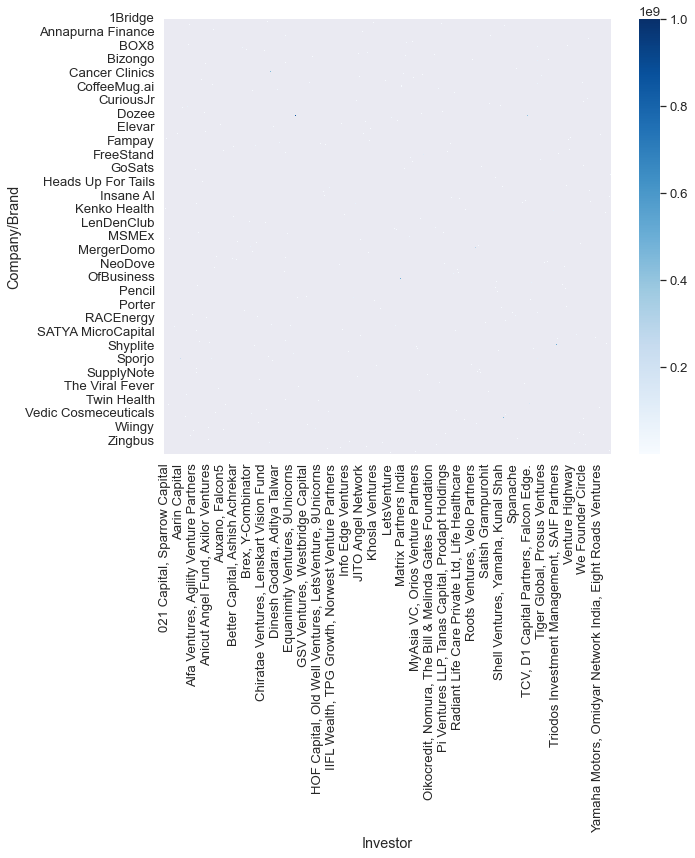

In [22]:
# create a pivot table of investors and funding
pivot_df = pd.pivot_table(df_21, values='Amount($)', index='Company/Brand', columns='Investor')

# create the heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, cmap='Blues');

In [23]:
df_21.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,NaN
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed


In [24]:
# group by funding
funding = df_21.groupby('Company/Brand')['Amount($)'].max().sort_values(ascending=False)
funding.head(20)

Company/Brand
Alteria Capital     1.500000e+11
VerSe Innovation    1.000000e+09
Dream Sports        8.400000e+08
Swiggy              8.000000e+08
OYO                 6.600000e+08
Zetwerk             6.000000e+08
Meesho              5.700000e+08
Ola                 5.000000e+08
ShareChat           5.000000e+08
BYJU'S              4.600000e+08
CARS24              4.500000e+08
BharatPe            3.700000e+08
PharmEasy           3.500000e+08
OfBusiness          3.250000e+08
Udaan               2.800000e+08
Delhivery           2.700000e+08
Mohalla Tech        2.660000e+08
CoinSwitch Kuber    2.600000e+08
Acko                2.550000e+08
CRED                2.500000e+08
Name: Amount($), dtype: float64

In [25]:

# convert the 'Amount($)' column to a numeric data type
df_21['Amount($)'] = df_21['Amount($)'].astype(float)

# group by sector and sum the funding amount
sector_funding = df_21.groupby('Sector')['Amount($)'].sum()

# get top 10 sectors with highest funding amount
top_10_sectors = sector_funding.nlargest(10)
# create a new dataframe with the top 10 sectors and their funding amounts
top_10_df = pd.DataFrame({'Sector': top_10_sectors.index, 'Funding Amount': top_10_sectors.values})

# print the dataframe
print(top_10_df)

                  Sector  Funding Amount
0                FinTech    1.526120e+11
1             Automotive    2.055700e+09
2                 EdTech    1.941530e+09
3     Financial Services    1.554950e+09
4             E-commerce    1.329445e+09
5  Innovation Management    1.000000e+09
6            Hospitality    9.218000e+08
7                 Sports    8.420000e+08
8          Food delivery    8.000000e+08
9        Social commerce    7.179000e+08


In [26]:
df_21['Stage'].unique

<bound method Series.unique of 0       Pre-series A
1                NaN
2           Series D
3           Series C
4               Seed
            ...     
1202    Pre-series A
1203        Series D
1204        Series C
1205        Series B
1206        Series A
Name: Stage, Length: 1063, dtype: object>

In [27]:
# Impute missing values in the Stage column with the mode
df_21['Stage'].fillna(df_21['Stage'].mode()[0], inplace=True)

In [28]:
founders_count = []
for founders in df_21['Founders']:
    if isinstance(founders, float):
        # Handle missing values or replace with a default value
        founders_count.append(0)
    else:
        # Split the string of names by comma and count the number of founders
        founders_count.append(len(founders.split(',')))

# Add the list of founder counts to the dataframe
df_21['Number of Founders'] = founders_count

In [29]:
df_21.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Number of Founders
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,Seed,4
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,2
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,3
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,1


In [30]:
df_21['Company/Brand'].duplicated

<bound method Series.duplicated of 0       Unbox Robotics
1               upGrad
2          Lead School
3              Bizongo
4             FypMoney
             ...      
1202          Gigforce
1203            Vahdam
1204      Leap Finance
1205      CollegeDekho
1206            WeRize
Name: Company/Brand, Length: 1063, dtype: object>

In [31]:
# check for duplicates in Bizongo startup
df_21.loc[df_21['Company/Brand']=="Bizongo"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Number of Founders
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,3
223,Bizongo,2015,Mumbai,Information Technology & Services,Bizongo is India’s largest B2B platform for ma...,"Sachin Agrawal, Aniket Deb, Ankit Tomar",Tiger Global,100000000.0,Series D,3
275,Bizongo,2015,Mumbai,B2B Ecommerce,izongo is India’s largest B2B platform for mad...,"Sachin Agrawal, Aniket Deb, Ankit Tomar",Tiger Global,100000000.0,Series D,3


In [32]:
# drop row 275 which is a duplicate of row 223
df_21.drop([275],axis=0, inplace= True)

In [33]:
# check for duplicates in Fullife Healthcare
df_21.loc[df_21['Company/Brand']=="Fullife Healthcare"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Number of Founders
240,Fullife Healthcare,2009,Unknown,Pharmaceuticals,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,22000000.0,Series C,1
254,Fullife Healthcare,2009,Unknown,Pharmaceuticals,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,22000000.0,Series C,1


In [34]:
# drop duplicate row in Fullife Healthcare
df_21.drop([254], axis=0, inplace= True)

In [35]:
# We can clearly see in the row at index 1148, the columns investor, amount and stage have wrong values
df_21.loc[df_21['Company/Brand'] == "Godamwale"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Number of Founders


In [36]:
# correcting errors at index 1148 
df_21.loc[df_21['Company/Brand']== "Godamwale", ["Amount($)","Stage","Investor"]] = [1000000,"Seed","ah! Ventures"]

df_21.loc[df_21['Company/Brand']== "Godamwale"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Number of Founders


In [37]:
# check row 672 for abnormalities
df_21.loc[df_21['Company/Brand']== "MYRE Capital"]


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Number of Founders


In [38]:
# re-arrange the row entries in MYRE Capital
df_21.loc[df_21["Company/Brand"] =="MYRE Capital", ["Founders","Amount($)","Stage","Investor"]] = ["Aryaman Vir",6000000, "Seed","ITO Angel Network LetsVenture"]

df_21.loc[df_21["Company/Brand"] =="MYRE Capital"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Number of Founders


In [39]:
sector_df=(df_21.loc[:,'Sector']).value_counts()
sector_df.head(30)

FinTech                              109
EdTech                                85
Financial Services                    57
Information Technology & Services     36
E-commerce                            35
Food & Beverages                      30
Automotive                            29
E-learning                            23
Consumer Goods                        22
Healthcare                            21
AgriTech                              19
Gaming                                18
HealthCare                            17
Retail                                17
Logistics & Supply Chain              16
Health, Wellness & Fitness            16
Computer Software                     15
Logistics                             13
HealthTech                            12
Hospitality                           12
Hospital & Health Care                11
SaaS startup                          11
Tech Startup                           9
Media                                  8
Insurance       

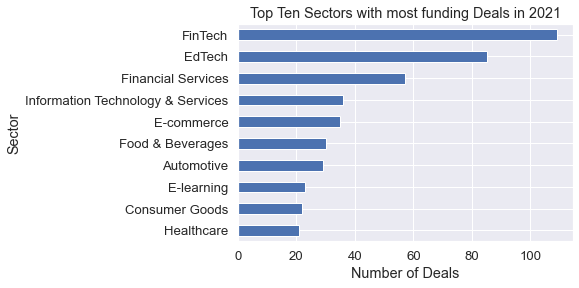

In [40]:
sector_df.head(10).sort_values().plot.barh()
plt.xlabel('Number of Deals')
plt.ylabel('Sector')
plt.title('Top Ten Sectors with most funding Deals in 2021');

In [41]:
df_clean_21=df_21
df_clean_21

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Number of Founders
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,Seed,4
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,2
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,3
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,1
...,...,...,...,...,...,...,...,...,...,...
1202,Gigforce,2019,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000.0,Pre-series A,2
1203,Vahdam,2015,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000.0,Series D,1
1204,Leap Finance,2019,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000.0,Series C,2
1205,CollegeDekho,2015,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000.0,Series B,1


In [42]:
df_clean_21['HeadQuarter'].sample(60).value_counts()

Bangalore                            23
New Delhi                             9
Gurugram                              8
Chennai                               5
Mumbai                                4
Noida                                 2
Pune                                  2
Hyderabad                             2
Bhilwara                              1
Ghaziabad                             1
Information Technology & Services     1
Small Towns, Andhra Pradesh           1
West Bengal                           1
Name: HeadQuarter, dtype: int64

## Clean 2020 data

In [43]:
df_20.head()

,1MG,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Zvesta,1973.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN
1,Zuper,1978.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed
2,Zupee,1982.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed
3,ZunRoof,1994.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN
4,Zoomcar,1995.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN


In [44]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1MG           1055 non-null   object 
 1   Founded       869 non-null    float64
 2   HeadQuarter   971 non-null    object 
 3   Sector        1042 non-null   object 
 4   What it does  1055 non-null   object 
 5   Founders      1043 non-null   object 
 6   Investor      1017 non-null   object 
 7   Amount($)     1052 non-null   object 
 8   Stage         591 non-null    object 
dtypes: float64(1), object(8)
memory usage: 74.3+ KB


In [45]:
df_20.isna().sum()

1MG               0
Founded         186
HeadQuarter      84
Sector           13
What it does      0
Founders         12
Investor         38
Amount($)         3
Stage           464
dtype: int64

In [46]:
founders_count = []
for founders in df_20['Founders']:
    if isinstance(founders, float):
        # Handle missing values or replace with a default value
        founders_count.append(0)
    else:
        # Split the string of names by comma and count the number of founders
        founders_count.append(len(founders.split(',')))

# Add the list of founder counts to the dataframe
df_20['Number of Founders'] = founders_count

In [47]:
df_20.head()

,1MG,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Number of Founders
0,Zvesta,1973.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,2
1,Zuper,1978.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,2
2,Zupee,1982.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,1
3,ZunRoof,1994.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,1
4,Zoomcar,1995.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,4


In [48]:
df_20['HeadQuarter'].value_counts()

Bangalore                 318
Mumbai                    166
Gurugram                   81
Delhi                      62
Chennai                    43
                         ... 
Jiaxing                     1
Rajastan                    1
Tirunelveli, Tamilnadu      1
Ludhiana                    1
Tangerang, Indonesia        1
Name: HeadQuarter, Length: 67, dtype: int64

In [49]:
df_20=df_20.rename(columns={'1MG':'Company/Brand'})

In [50]:
df_20['Founded'].astype(str)

0       1973.0
1       1978.0
2       1982.0
3       1994.0
4       1995.0
         ...  
1050       nan
1051       nan
1052       nan
1053       nan
1054       nan
Name: Founded, Length: 1055, dtype: object

In [51]:
df_20.dtypes

Company/Brand          object
Founded               float64
HeadQuarter            object
Sector                 object
What it does           object
Founders               object
Investor               object
Amount($)              object
Stage                  object
Number of Founders      int64
dtype: object

In [52]:

df_20['HeadQuarter'] = df_20['HeadQuarter'].apply(str)


df_20['HeadQuarter'] = df_20['HeadQuarter'].str.split(',').str[0]

df_20['HeadQuarter'] = df_20['HeadQuarter'].replace("'","",regex= True)
df_20

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Number of Founders
0,Zvesta,1973.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,2
1,Zuper,1978.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,2
2,Zupee,1982.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,1
3,ZunRoof,1994.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,1
4,Zoomcar,1995.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,4
...,...,...,...,...,...,...,...,...,...,...
1050,Aadhar,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures","$1,500,000",NaN,1
1051,91springboard,NaN,nan,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital","$13,200,000",Seed Round,2
1052,6Degree,NaN,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,"$8,000,000",NaN,2
1053,5C Network,NaN,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,"$8,043,000",Series C,2


In [53]:
# clean Amount($) column
def clean_amount(amount_str):
    try:
        # Remove commas and dollar signs
        amount_str = amount_str.replace(',', '').replace('$', '')
        
        # Check for invalid strings
        if amount_str in ['Undisclosed']:
            return np.nan
        
        return float(amount_str)
    except:
        return np.nan

df_20['Amount($)'] = df_20['Amount($)'].apply(clean_amount)

In [54]:
# add column Year of Funding
df_20['Year_of_Funding']="2020"

In [55]:
df_20=df_20[['Company/Brand','Founded','HeadQuarter','Sector','Founders','Investor','Amount($)','Stage','Year_of_Funding','Number of Founders','What it does']]

In [56]:
df_20.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year_of_Funding,Number of Founders,What it does
0,Zvesta,1973.0,Chennai,AgriTech,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN,2020,2,Cultivating Ideas for Profit
1,Zuper,1978.0,Bangalore,EdTech,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020,2,An academy-guardian-scholar centric ecosystem ...
2,Zupee,1982.0,Pune,Hygiene management,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020,1,Converting bio-hazardous waste to harmless waste
3,ZunRoof,1994.0,New Delhi,Escrow,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,NaN,2020,1,Escrow-as-a-service platform
4,Zoomcar,1995.0,Indore,AgriTech,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,NaN,2020,4,Gramophone is an AgTech platform enabling acce...


In [57]:
df_clean_20=df_20
df_clean_20.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year_of_Funding,Number of Founders,What it does
0,Zvesta,1973.0,Chennai,AgriTech,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN,2020,2,Cultivating Ideas for Profit
1,Zuper,1978.0,Bangalore,EdTech,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020,2,An academy-guardian-scholar centric ecosystem ...
2,Zupee,1982.0,Pune,Hygiene management,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020,1,Converting bio-hazardous waste to harmless waste
3,ZunRoof,1994.0,New Delhi,Escrow,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,NaN,2020,1,Escrow-as-a-service platform
4,Zoomcar,1995.0,Indore,AgriTech,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,NaN,2020,4,Gramophone is an AgTech platform enabling acce...


In [58]:
sector1_df=(df_20.loc[:,'Sector']).value_counts()
sector1_df.head(30)

Fintech          80
Edtech           67
FinTech          51
EdTech           40
E-commerce       33
Healthtech       28
SaaS             24
Ecommerce        22
AgriTech         19
Agritech         19
Tech             19
Media            19
AI               18
Gaming           16
Logistics        16
SaaS startup     15
HealthTech       14
Tech Startup     14
AI startup       12
Food             12
Foodtech         12
Entertainment    12
Tech company     10
Healthcare        9
IoT               8
Fashion           7
Automobile        7
Cosmetics         7
Real Estate       6
Finance           6
Name: Sector, dtype: int64

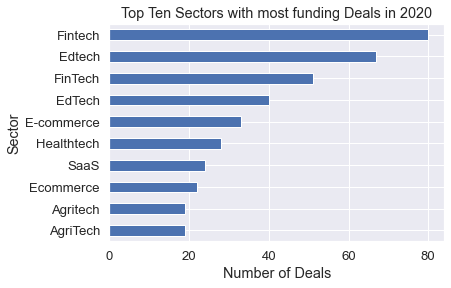

In [59]:
sector1_df.head(10).sort_values().plot.barh()
plt.xlabel('Number of Deals')
plt.ylabel('Sector')
plt.title('Top Ten Sectors with most funding Deals in 2020');

## Clean 2019 data

In [60]:
df_19.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [61]:
df_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [62]:
def clean_amount(amount_str):
    try:
        # Remove commas and dollar signs
        amount_str = amount_str.replace(',', '').replace('$', '')
        
        # Check for invalid strings
        if amount_str in ['Undisclosed']:
            return np.nan
        
        return float(amount_str)
    except:
        return np.nan

df_19['Amount($)'] = df_19['Amount($)'].apply(clean_amount)

In [63]:
founders_count = []
for founders in df_19['Founders']:
    if isinstance(founders, float):
        # Handle missing values or replace with a default value
        founders_count.append(0)
    else:
        # Split the string of names by comma and count the number of founders
        founders_count.append(len(founders.split(',')))

# Add the list of founder counts to the dataframe
df_19['Number of Founders'] = founders_count

In [64]:
df_19['Year_of_Funding']="2019"

In [65]:
df_19=df_19[['Company/Brand','Founded','HeadQuarter','Sector','Founders','Investor','Amount($)','Stage','Year_of_Funding','Number of Founders','What it does']]

In [66]:
df_19.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year_of_Funding,Number of Founders,What it does
0,Bombay Shaving,NaN,NaN,Ecommerce,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019,1,Provides a range of male grooming products
1,Ruangguru,2014.0,Mumbai,Edtech,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019,2,A learning platform that provides topic-based ...
2,Eduisfun,NaN,Mumbai,Edtech,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019,1,It aims to make learning fun via games.
3,HomeLane,2014.0,Chennai,Interior design,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019,2,Provides interior designing solutions
4,Nu Genes,2004.0,Telangana,AgriTech,Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019,1,"It is a seed company engaged in production, pr..."


In [67]:
sector2_df=(df_19.loc[:,'Sector']).value_counts()
sector2_df.head(30)

Edtech                          7
Fintech                         5
AgriTech                        4
Technology                      4
SaaS                            4
Automobile                      3
E-commerce                      3
Logistics                       3
Food                            2
Foodtech                        2
Accomodation                    2
Automotive tech                 2
IoT                             2
AI                              2
E-marketplace                   2
Ecommerce                       1
Cybersecurity                   1
Mutual Funds                    1
Food & tech                     1
Legal tech                      1
Sports                          1
B2B Supply Chain                1
Healthtech                      1
Yoga & wellness                 1
Virtual Banking                 1
Transportation                  1
Transport & Rentals             1
Marketing & Customer loyalty    1
Infratech                       1
Hospitality   

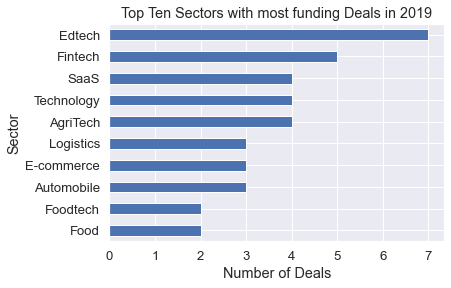

In [68]:
sector2_df.head(10).sort_values().plot.barh()
plt.xlabel('Number of Deals')
plt.ylabel('Sector')
plt.title('Top Ten Sectors with most funding Deals in 2019');

## Clean 2018 Data

In [69]:
df_18.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"?40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"?65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [70]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [71]:
df_18['Industry'] = df_18['Industry'].apply(str)
df_18['Industry'] = df_18['Industry'].str.split(',').str[0]
df_18['Industry'] = df_18['Industry'].replace("'","",regex=True)

In [72]:
df_18['Location'] = df_18['Location'].apply(str)
df_18['Location'] = df_18['Location'].str.split(',').str[0]
df_18['Location'] = df_18['Location'].replace("'","",regex = True)

In [73]:
df_18['Amount'].value_counts()

—              148
1000000         24
500000          13
2000000         12
?50,000,000      9
              ... 
2200000          1
1200000          1
$15,000          1
$1,041,000       1
35000000         1
Name: Amount, Length: 198, dtype: int64

In [74]:
df_18['Amount'] = df_18['Amount'].apply(str)



df_18['Amount'] = df_18['Amount'].replace(",","",regex = True)
df_18['Amount'] = df_18['Amount'].replace("—",0)
df_18['Amount'] = df_18['Amount'].replace("$","")
df_18.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,Agriculture,Seed,?40000000,Mumbai,A startup which aggregates milk from dairy far...
2,MyLoanCare,Credit,Series A,?65000000,Gurgaon,Leading Online Loans Marketplace in India
3,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...
4,Eunimart,E-Commerce Platforms,Seed,0,Hyderabad,Eunimart is a one stop solution for merchants ...


In [75]:
df_18['Amount'] = df_18['Amount'].replace(",","")
df_18.tail(20)

,Company Name,Industry,Round/Series,Amount,Location,About Company
506,Verzeo,E-Learning,Series A,5000000,Bangalore,Verzeo is anAI-focussed edtech startup.
507,Haazri,Food and Beverage,Seed,?12500000,Mumbai,Haazri is a tea and snack quick service restau...
508,Connect India,Delivery Service,Angel,0,New Delhi,To create pervasive network where connections ...
509,Flyrobe,Fashion,Series B,?264000000,Mumbai,Flyrobe is an on-demand apparel rental platfor...
510,Scholify,—,Pre-Seed,0,Bengaluru,Edutech
511,Dream11,Fantasy Sports,Series D,100000000,Mumbai,Dream11 is India’s Biggest Sports Game with 30...
512,srJna,Education,Seed,0,Jaipur,"SRJNA is a brand of Elation Edtech Pvt. Ltd., ..."
513,Nykaa,Beauty,Secondary Market,?1130000000,Mumbai,Nykaa.com is a premier online beauty and welln...
514,Chaayos,Food and Beverage,Series B,?810000000,New Delhi,Chaayos was born in November 2012 out of this ...
515,Heelium,Fitness,Seed,0,Pune,Heelium is an athletic footwear and wearable s...


In [76]:
# split '₹' represented as '?' which is the Indian rupee and convert it to USD 
df_18['INR_Amount'] = df_18['Amount'].str.rsplit('?',n =2).str[1]
df_18.head()
df_18['INR_Amount'] = df_18['INR_Amount'].apply(float).fillna(0)
df_18.head()
df_18['USD_Amount'] = df_18['INR_Amount']*0.01208
df_18.head()
df_18['USD_Amount'] = df_18['USD_Amount'].replace(0,np.nan)
df_18.head()
df_18['USD_Amount'] = df_18['USD_Amount'].fillna(df_18['Amount'])
df_18.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company,INR_Amount,USD_Amount
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",0.0,250000
1,Happy Cow Dairy,Agriculture,Seed,?40000000,Mumbai,A startup which aggregates milk from dairy far...,40000000.0,483200.0
2,MyLoanCare,Credit,Series A,?65000000,Gurgaon,Leading Online Loans Marketplace in India,65000000.0,785200.0
3,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...,0.0,2000000
4,Eunimart,E-Commerce Platforms,Seed,0,Hyderabad,Eunimart is a one stop solution for merchants ...,0.0,0


In [77]:
df_18['USD_Amount'] = df_18['USD_Amount'].apply(str)
df_18['USD_Amount'] = df_18['USD_Amount'].replace('$','',regex = True)

In [78]:
df_18['USD_Amount'] = df_18['USD_Amount'].apply(lambda x: float(str(x).replace("$","")))
df_18['USD_Amount'].value_counts()

0.0          148
1000000.0     27
2000000.0     15
500000.0      13
5000000.0      9
            ... 
1800000.0      1
2200000.0      1
1200000.0      1
15000.0        1
7500.0         1
Name: USD_Amount, Length: 180, dtype: int64

In [79]:
df_18['USD_Amount'] = df_18['USD_Amount'].replace(0,np.nan)
df_18.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company,INR_Amount,USD_Amount
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",0.0,250000.0
1,Happy Cow Dairy,Agriculture,Seed,?40000000,Mumbai,A startup which aggregates milk from dairy far...,40000000.0,483200.0
2,MyLoanCare,Credit,Series A,?65000000,Gurgaon,Leading Online Loans Marketplace in India,65000000.0,785200.0
3,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...,0.0,2000000.0
4,Eunimart,E-Commerce Platforms,Seed,0,Hyderabad,Eunimart is a one stop solution for merchants ...,0.0,NaN


In [80]:
df_18.drop(columns= ['INR_Amount','Amount'], inplace = True)
df_18.head()

,Company Name,Industry,Round/Series,Location,About Company,USD_Amount
0,TheCollegeFever,Brand Marketing,Seed,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",250000.0
1,Happy Cow Dairy,Agriculture,Seed,Mumbai,A startup which aggregates milk from dairy far...,483200.0
2,MyLoanCare,Credit,Series A,Gurgaon,Leading Online Loans Marketplace in India,785200.0
3,PayMe India,Financial Services,Angel,Noida,PayMe India is an innovative FinTech organizat...,2000000.0
4,Eunimart,E-Commerce Platforms,Seed,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN


In [81]:
df_18.rename(columns={'USD_Amount':'Amount($)'}, inplace=True)
df_18.sample(15)

,Company Name,Industry,Round/Series,Location,About Company,Amount($)
285,Locus.sh,Big Data,Series A,Bangalore,Locus is an intelligent logistics automation p...,4000000.0
466,Bounce (Metro Bikes),Autonomous Vehicles,Debt Financing,Bangalore,Bounce (formerly Metro Bikes) is an urban mobi...,3000000.0
461,Strom Motors,Automotive,Angel,Mumbai,Strom Motors is a smart urban mobility Company.,NaN
140,OTO Capital,Automotive,Seed,Mumbai,OTO Capital is a platform that allows you to o...,604000.0
402,FarmTaaza,Agriculture,Series A,Bengaluru,Farm Taaza provides expert advice to the farme...,NaN
35,Loadshare,Industrial Automation,Series A,Bengaluru,LoadShare is India’s fastest growing logistics...,5000000.0
432,Taru Naturals,Agriculture,Seed,Mumbai,Taru Naturals is a network that connects farme...,NaN
210,Cell Propulsion,—,Seed,Bangalore,Cell Propulsion is an electric mobility startu...,84560.0
525,Netmeds,Biotechnology,Series C,Chennai,Welcome to India's most convenient pharmacy!,35000000.0
343,Wishfie,Apps,Seed,Bangalore,A platform for people to express their opinion...,NaN


In [82]:
df_18['Round/Series'] = df_18['Round/Series'].replace("https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593", "Seed")

In [83]:
df_18['Year_of_Funding']='2018'
df_18.head()

,Company Name,Industry,Round/Series,Location,About Company,Amount($),Year_of_Funding
0,TheCollegeFever,Brand Marketing,Seed,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",250000.0,2018
1,Happy Cow Dairy,Agriculture,Seed,Mumbai,A startup which aggregates milk from dairy far...,483200.0,2018
2,MyLoanCare,Credit,Series A,Gurgaon,Leading Online Loans Marketplace in India,785200.0,2018
3,PayMe India,Financial Services,Angel,Noida,PayMe India is an innovative FinTech organizat...,2000000.0,2018
4,Eunimart,E-Commerce Platforms,Seed,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN,2018
